In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
%matplotlib inline

In [2]:
ipos = pd.read_csv(r'/Users/nnguyen/Documents/_Dev/py_ml_projects/ipo_data.csv', encoding='latin-1')

In [3]:
ipos.head()

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed
0,1/13/17,Gores Holdings II,GSHTU,Deutsche Bank Securities,$10.00,$10.16,$10.25,2.50%,$0.16,$0.25,1,NaN
1,1/20/17,FinTech Acquisition Corp. II,FNTEU,Cantor Fitzgerald & Co.,$10.00,$10.10,$10.05,0.50%,$0.10,$0.05,1,NaN
2,1/20/17,Keane Group,FRAC,Citigroup/ Morgan Stanley/ BofA Merrill Lynch/...,$19.00,$22.18,$21.65,13.95%,$3.18,$2.65,3,NaN
3,1/26/17,AnaptysBio,ANAB,Credit Suisse/ Stifel,$15.00,$16.00,$17.00,13.33%,$1.00,$2.00,2,NaN
4,1/26/17,ObsEva SA,OBSV,Credit Suisse/ Jefferies/ Leerink Partners,$15.00,$13.29,$11.65,-22.33%,-$1.71,-$3.35,2,Missed


In [5]:
# removing $ and % sign
ipos = ipos.applymap(lambda x: x if not '$' in str(x) else x.replace('$',''))
ipos = ipos.applymap(lambda x: x if not '%' in str(x) else x.replace('%',''))
ipos.head()

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed
0,1/13/17,Gores Holdings II,GSHTU,Deutsche Bank Securities,10.00,10.16,10.25,2.50,0.16,0.25,1,NaN
1,1/20/17,FinTech Acquisition Corp. II,FNTEU,Cantor Fitzgerald & Co.,10.00,10.10,10.05,0.50,0.10,0.05,1,NaN
2,1/20/17,Keane Group,FRAC,Citigroup/ Morgan Stanley/ BofA Merrill Lynch/...,19.00,22.18,21.65,13.95,3.18,2.65,3,NaN
3,1/26/17,AnaptysBio,ANAB,Credit Suisse/ Stifel,15.00,16.00,17.00,13.33,1.00,2.00,2,NaN
4,1/26/17,ObsEva SA,OBSV,Credit Suisse/ Jefferies/ Leerink Partners,15.00,13.29,11.65,-22.33,-1.71,-3.35,2,Missed


In [7]:
# out of bound. because this date is incorrect
ipos[ipos['Date'] == '11/120']

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed
1090,11/120,"Alon USA Partners, LP",ALDW,"Goldman, Sachs/ Credit Suisse/ Citigroup",16.00,17.00,18.40,15.00,1.00,2.40,1,NaN


In [8]:
# replace to correct date
ipos.loc[1090, 'Date'] = '2012-11-20'

In [9]:
# convert following to float data type 
# so it can be used to perform calculation later
ipos.replace('N/C', 0, inplace=True)
ipos['Date'] = pd.to_datetime(ipos['Date'])
ipos['Offer Price'] = ipos['Offer Price'].astype('float')
ipos['Opening Price'] = ipos['Opening Price'].astype('float')
ipos['1st Day Close'] = ipos['1st Day Close'].astype('float')
ipos['1st Day % Px Chng'] = ipos['1st Day % Px Chng'].astype('float')
ipos['$ Change Opening'] = ipos['$ Change Opening'].astype('float')
ipos['$ Change Close'] = ipos['$ Change Close'].astype('float')
ipos['Star Ratings'] = ipos['Star Ratings'].astype('int')

In [10]:
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 12 columns):
Date                        2955 non-null datetime64[ns]
Issuer                      2955 non-null object
Symbol                      2955 non-null object
Lead/Joint-Lead Managers    2955 non-null object
Offer Price                 2955 non-null float64
Opening Price               2955 non-null float64
1st Day Close               2955 non-null float64
1st Day % Px Chng           2955 non-null float64
$ Change Opening            2955 non-null float64
$ Change Close              2955 non-null float64
Star Ratings                2955 non-null int64
Performed                   341 non-null object
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 277.1+ KB


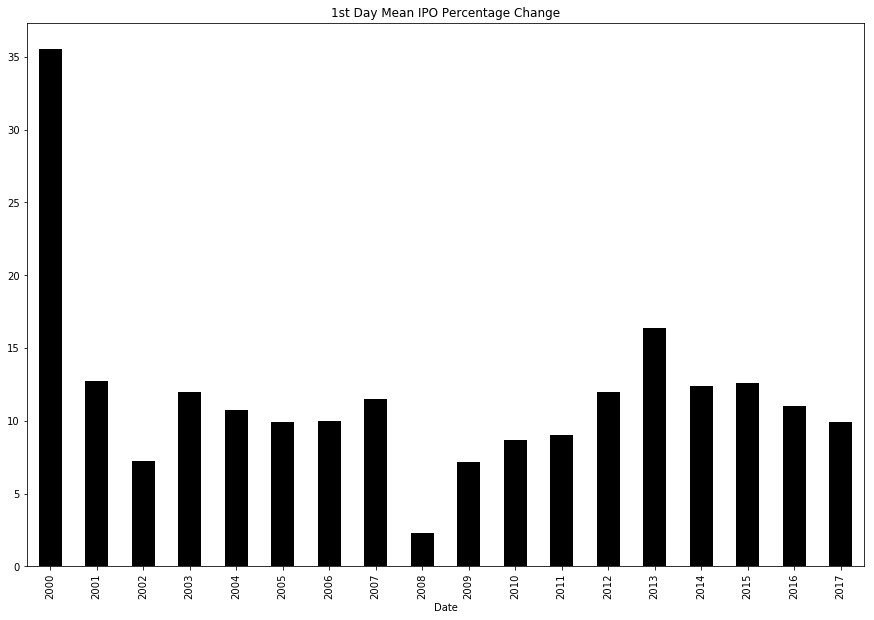

In [11]:
# historgram of mean
ipos.groupby(ipos['Date'].dt.year)['1st Day % Px Chng'].mean().plot(kind='bar', figsize=(15,10), color='k', title='1st Day Mean IPO Percentage Change')

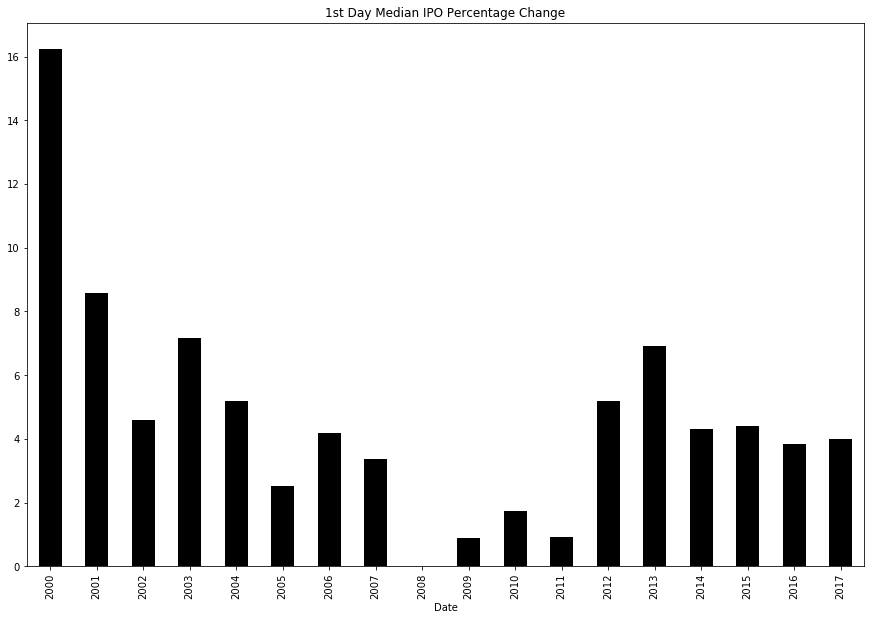

In [12]:
#histogram of median
ipos.groupby(ipos['Date'].dt.year)['1st Day % Px Chng']\
.median().plot(kind='bar', figsize=(15,10), color='k', title ='1st Day Median IPO Percentage Change')

In [13]:
# statistics of 1st day percentage change
ipos['1st Day % Px Chng'].describe()

count    2955.000000
mean       12.984625
std        27.340029
min       -41.080000
25%         0.000000
50%         4.550000
75%        18.835000
max       353.850000
Name: 1st Day % Px Chng, dtype: float64

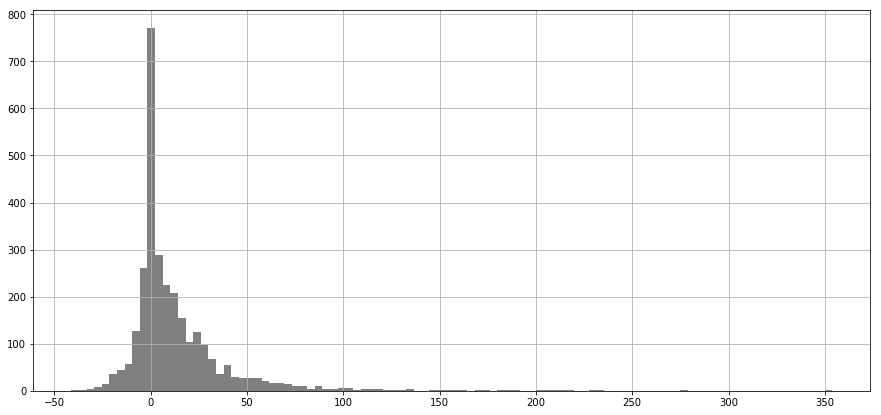

In [14]:
# historgram of 1st day percentage change
ipos['1st Day % Px Chng'].hist(figsize=(15,7), bins=100, color='grey')

# most return cluster around 0, but long tail to the right.
# 1st day % Px Chng is offering price to the closing price.

In [15]:
# different of opening to closing price
# % is percentage of dollar change

ipos['$ Chg Open to Close'] = ipos['$ Change Close'] - ipos['$ Change Opening']
ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close']/ipos['Opening Price'])* 100
ipos.head()



,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
0,2017-01-13,Gores Holdings II,GSHTU,Deutsche Bank Securities,10.0,10.16,10.25,2.50,0.16,0.25,1,NaN,0.09,0.885827
1,2017-01-20,FinTech Acquisition Corp. II,FNTEU,Cantor Fitzgerald & Co.,10.0,10.10,10.05,0.50,0.10,0.05,1,NaN,-0.05,-0.495050
2,2017-01-20,Keane Group,FRAC,Citigroup/ Morgan Stanley/ BofA Merrill Lynch/...,19.0,22.18,21.65,13.95,3.18,2.65,3,NaN,-0.53,-2.389540
3,2017-01-26,AnaptysBio,ANAB,Credit Suisse/ Stifel,15.0,16.00,17.00,13.33,1.00,2.00,2,NaN,1.00,6.250000
4,2017-01-26,ObsEva SA,OBSV,Credit Suisse/ Jefferies/ Leerink Partners,15.0,13.29,11.65,-22.33,-1.71,-3.35,2,Missed,-1.64,-12.340105


In [16]:
ipos['$ Chg Open to Close'].describe()

count    2955.000000
mean        0.261986
std         2.306016
min       -24.230000
25%        -0.420000
50%         0.000000
75%         0.620000
max        56.540000
Name: $ Chg Open to Close, dtype: float64

In [17]:
ipos[ipos['$ Chg Open to Close']<-106]

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close


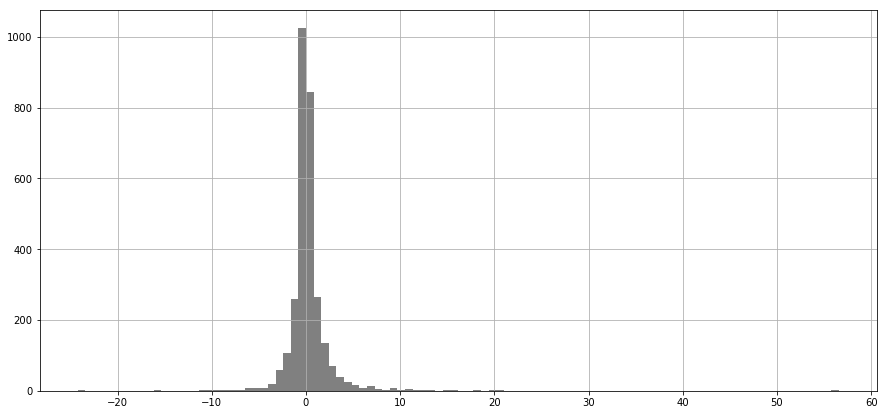

In [155]:
# distribution of opening and closing prices

ipos['$ Chg Open to Close'].hist(figsize=(15,7), bins=100, color='grey')


In [156]:
# if we were to purchase IPO at every opening price.

ipos[ipos['Date'] >= '2015-01-01']['$ Chg Open to Close'].describe()

count    436.000000
mean       0.152317
std        2.005113
min       -6.160000
25%       -0.550000
50%        0.000000
75%        0.552500
max       20.040000
Name: $ Chg Open to Close, dtype: float64

In [157]:
ipos[ipos['Date'] >= '2015-01-01']['$ Chg Open to Close'].sum()

66.41000000000004

In [158]:
#winning trait
ipos[(ipos['Date'] >= '2015-01-01')&(ipos['$ Chg Open to Close']>0)]['$ Chg Open to Close'].describe()

count    205.000000
mean       1.279659
std        2.216980
min        0.010000
25%        0.170000
50%        0.640000
75%        1.450000
max       20.040000
Name: $ Chg Open to Close, dtype: float64

In [159]:
#losing trait
ipos[(ipos['Date'] >= '2015-01-01')&(ipos['$ Chg Open to Close']<0)]['$ Chg Open to Close'].describe()

count    202.000000
mean      -0.969901
std        1.071215
min       -6.160000
25%       -1.247500
50%       -0.645000
75%       -0.212500
max       -0.010000
Name: $ Chg Open to Close, dtype: float64

In [ ]:
# if we purchase all IPO, half will win and half will lose.
# strategy is to need to use machine learning to target long right tail.


In [160]:
#Feature Engineering
# add, correct, change features
# if features are not informative - model of no value

# maybe prestidge of underwriter affects the price? We want to find out.

#avoid leaking information while adding features
# happens when info is taken from data unavailable at the time (like adding closing price)

# leakage mistakes = subtle but a concern

# Factors to add: month, day of the week, lead manager, total underwriters,
# offer to open gap percentage, dollar change from offer to open,
# offering price, opening price, S&P close to open percent, S&P prior week change


In [18]:
sp = pd.read_csv(r'/Users/nnguyen/Documents/_Dev/py_ml_projects/spy.csv', encoding='latin-1')
sp.sort_values('Date',inplace=True)
sp.reset_index(drop=True, inplace=True)
sp.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,2002.109985,2002.109985,2002.109985,2002.109985,2002.109985,0
1,2000-01-04,1925.410034,1925.410034,1925.410034,1925.410034,1925.410034,0
2,2000-01-05,1929.280029,1929.280029,1929.280029,1929.280029,1929.280029,0
3,2000-01-06,1931.510010,1931.510010,1931.510010,1931.510010,1931.510010,0
4,2000-01-07,1983.829956,1983.829956,1983.829956,1983.829956,1983.829956,0


In [19]:
# method to get the week change ( calculate the last 7 days performance)
def get_week_chg(ipo_dt):
    try:
        day_ago_idx =  sp[sp['Date'] == str(ipo_dt.date())].index[0] - 1
        week_ago_idx = sp[sp['Date'] == str(ipo_dt.date())].index[0] - 8
        chg = (sp.iloc[day_ago_idx]['Close'] - \
                sp.iloc[week_ago_idx]['Close'])/(sp.iloc[week_ago_idx]['Close'])
        return chg * 100
    except:
        print('error', ipo_dt.date())

In [20]:
#IPO has a few error.
ipos['SP Week Change'] = ipos['Date'].map(get_week_chg)

error 2015-02-21
error 2015-02-21
error 2013-11-16
error 2009-08-01


In [21]:
ipos[ipos['Date'] == '2009-08-01']

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change
1418,2009-08-01,Emdeon,EM,Morgan Stanley,15.0,17.5,16.52,10.13,2.5,1.52,3,NaN,-0.98,-5.6,NaN


In [22]:
ipos[ipos['Date'] == '2013-11-16']

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change
919,2013-11-16,Wix.com Ltd.,WIX,J.P. Morgan/ BofA Merrill Lynch/ RBC Capital M...,16.5,18.5,16.31,-1.15,2.0,-0.19,3,NaN,-2.19,-11.837838,NaN


In [23]:
ipos[ipos['Date'] == '2015-02-21']

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change
338,2015-02-21,Baozun,BZUN,Morgan Stanley/ Credit Suisse/ BofA Merrill Lynch,10.0,10.25,10.44,4.40,0.25,0.44,1,NaN,0.19,1.853659,NaN
339,2015-02-21,Community Healthcare Trust,CHCT,Sandler ONeill + Partners/ SunTrust Robinson H...,19.0,19.00,19.75,3.95,0.00,0.75,1,NaN,0.75,3.947368,NaN


In [24]:
# correcting the dates
ipos.loc[1418, 'Date'] = pd.to_datetime('2009-08-12')
ipos.loc[919, 'Date'] = pd.to_datetime('2012-11-20')
ipos.loc[338, 'Date'] = pd.to_datetime('2015-05-21')
ipos.loc[339, 'Date'] = pd.to_datetime('2015-05-21')


In [25]:
# should get no error now.
ipos['SP Week Change'] = ipos['Date'].map(get_week_chg)

In [26]:
# method to get closed to open change
def get_cto_chg(ipo_dt):
    try:
        today_open_idx = sp[sp['Date'] == str(ipo_dt.date())].index[0] # today open
        yday_close_idx = sp[sp['Date'] == str(ipo_dt.date())].index[0] - 1 # yesterday close
        chg = (sp.iloc[today_open_idx]['Open'] - \
               sp.iloc[yday_close_idx]['Close'])/(sp.iloc[yday_close_idx]['Close'])
        return chg * 100
    except:
        print('error',ipo_dt)

In [27]:
# calculate close to open percentage
ipos['Sp Close to Open Chg Pct'] = ipos['Date'].map(get_cto_chg)

In [28]:
ipos.head()

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change,Sp Close to Open Chg Pct
0,2017-01-13,Gores Holdings II,GSHTU,Deutsche Bank Securities,10.0,10.16,10.25,2.50,0.16,0.25,1,NaN,0.09,0.885827,0.625939,0.101107
1,2017-01-20,FinTech Acquisition Corp. II,FNTEU,Cantor Fitzgerald & Co.,10.0,10.10,10.05,0.50,0.10,0.05,1,NaN,-0.05,-0.495050,-0.199606,0.279913
2,2017-01-20,Keane Group,FRAC,Citigroup/ Morgan Stanley/ BofA Merrill Lynch/...,19.0,22.18,21.65,13.95,3.18,2.65,3,NaN,-0.53,-2.389540,-0.199606,0.279913
3,2017-01-26,AnaptysBio,ANAB,Credit Suisse/ Stifel,15.0,16.00,17.00,13.33,1.00,2.00,2,NaN,1.00,6.250000,1.068018,0.013194
4,2017-01-26,ObsEva SA,OBSV,Credit Suisse/ Jefferies/ Leerink Partners,15.0,13.29,11.65,-22.33,-1.71,-3.35,2,Missed,-1.64,-12.340105,1.068018,0.013194


In [29]:
# parse out lead manager by '/'
ipos['Lead Mgr'] = ipos['Lead/Joint-Lead Managers'].map(lambda x:x.split('/')[0])
ipos['Lead Mgr'] = ipos['Lead Mgr'].map(lambda x: x.strip())

In [30]:
for n in ipos['Lead Mgr'].unique():
    print(n)

Deutsche Bank Securities
Cantor Fitzgerald & Co.
Citigroup
Credit Suisse
Barclays
J.P. Morgan
Goldman Sachs
Raymond James
FBR
Joseph Gunnar
Morgan Stanley
BofA Merrill Lynch
Rodman & Renshaw (a Unit of H.C. Wainwright & Co.)
CIBC Capital Markets
Goldman, Sachs
UBS Securities
EarlyBirdCapital
Leerink Partners
Wells Fargo Securities
Jefferies
Dougherty & Company
Sandler ONeill + Partners
Roth Capital Partners
Macquarie Capital
Maxim Group
Wunderlich
UBS Investment Bank
Ladenburg Thalmann
D.A. Davidson
Cowen
BofA Merrill Lync
Oppenheimer
Sandler ONeill & Partners
WallachBeth Capital
Cowen and Company
Sandler ONeill
ViewTrade Securities
Maxim Group LLC
Craig-Hallum Capital Group
Piper Jaffray
National Securities Corporation
Goldman Sachs (Asia)
Cantor Fitzgerald
Sandler O'Neill + Partners
Stephens
J.P Morgan
Stifel
Sandler O'Neill & Partners
Chardan Capital Markets
Dawson James Securities
Laidlaw & Company (UK) Ltd.
Northland Capital Markets
Axiom Capital Management
RBC Capital Markets


In [31]:
ipos.loc[ipos['Lead Mgr'].str.contains('Hambrecht'),'Lead Mgr'] = 'WR Hambrecht+Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Edwards'), 'Lead Mgr'] = 'AG Edwards'

ipos.loc[ipos['Lead Mgr'].str.contains('Edwrads'), 'Lead Mgr'] = 'AG Edwards'

ipos.loc[ipos['Lead Mgr'].str.contains('Barclay'), 'Lead Mgr'] = 'Barclays'

ipos.loc[ipos['Lead Mgr'].str.contains('Aegis'), 'Lead Mgr'] = 'Aegis Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Deutsche'), 'Lead Mgr'] = 'Deutsche Bank'

ipos.loc[ipos['Lead Mgr'].str.contains('Suisse'), 'Lead Mgr'] = 'CSFB'

ipos.loc[ipos['Lead Mgr'].str.contains('CS.?F'), 'Lead Mgr'] = 'CSFB'

ipos.loc[ipos['Lead Mgr'].str.contains('^Early'), 'Lead Mgr'] = 'EarlyBirdCapital'

ipos.loc[325,'Lead Mgr'] = 'Maximum Captial'

ipos.loc[ipos['Lead Mgr'].str.contains('Keefe'), 'Lead Mgr'] = 'Keefe, Bruyette & Woods'

ipos.loc[ipos['Lead Mgr'].str.contains('Stan'), 'Lead Mgr'] = 'Morgan Stanley'

ipos.loc[ipos['Lead Mgr'].str.contains('P. Morg'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('PM'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('J\.P\.'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('Banc of'), 'Lead Mgr'] = 'Banc of America'

ipos.loc[ipos['Lead Mgr'].str.contains('Lych'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Merrill$'), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Lymch'), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('A Merril Lynch'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Merril '), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('BofA$'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('SANDLER'), 'Lead Mgr'] = 'Sandler O\'neil + Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Sandler'), 'Lead Mgr'] = 'Sandler O\'Neil + Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Renshaw'), 'Lead Mgr'] = 'Rodman & Renshaw'

ipos.loc[ipos['Lead Mgr'].str.contains('Baird'), 'Lead Mgr'] = 'RW Baird'

ipos.loc[ipos['Lead Mgr'].str.contains('Cantor'), 'Lead Mgr'] = 'Cantor Fitzgerald'

ipos.loc[ipos['Lead Mgr'].str.contains('Goldman'), 'Lead Mgr'] = 'Goldman Sachs'

ipos.loc[ipos['Lead Mgr'].str.contains('Bear'), 'Lead Mgr'] = 'Bear Stearns'

ipos.loc[ipos['Lead Mgr'].str.contains('BoA'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Broadband'), 'Lead Mgr'] = 'Broadband Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Davidson'), 'Lead Mgr'] = 'DA Davidson'

ipos.loc[ipos['Lead Mgr'].str.contains('Feltl'), 'Lead Mgr'] = 'Feltl & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('China'), 'Lead Mgr'] = 'China International'

ipos.loc[ipos['Lead Mgr'].str.contains('Cit'), 'Lead Mgr'] = 'Citigroup'

ipos.loc[ipos['Lead Mgr'].str.contains('Ferris'), 'Lead Mgr'] = 'Ferris Baker Watts'

ipos.loc[ipos['Lead Mgr'].str.contains('Friedman|Freidman|FBR'), 'Lead Mgr'] = 'Friedman Billings Ramsey'

ipos.loc[ipos['Lead Mgr'].str.contains('^I-'), 'Lead Mgr'] = 'I-Bankers'

ipos.loc[ipos['Lead Mgr'].str.contains('Gunn'), 'Lead Mgr'] = 'Gunn Allen'

ipos.loc[ipos['Lead Mgr'].str.contains('Jeffer'), 'Lead Mgr'] = 'Jefferies'

ipos.loc[ipos['Lead Mgr'].str.contains('Oppen'), 'Lead Mgr'] = 'Oppenheimer'

ipos.loc[ipos['Lead Mgr'].str.contains('JMP'), 'Lead Mgr'] = 'JMP Securities'

ipos.loc[ipos['Lead Mgr'].str.contains('Rice'), 'Lead Mgr'] = 'Johnson Rice'

ipos.loc[ipos['Lead Mgr'].str.contains('Ladenburg'), 'Lead Mgr'] = 'Ladenburg Thalmann'

ipos.loc[ipos['Lead Mgr'].str.contains('Piper'), 'Lead Mgr'] = 'Piper Jaffray'

ipos.loc[ipos['Lead Mgr'].str.contains('Pali'), 'Lead Mgr'] = 'Pali Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Paulson'), 'Lead Mgr'] = 'Paulson Investment Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Roth'), 'Lead Mgr'] = 'Roth Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Stifel'), 'Lead Mgr'] = 'Stifel Nicolaus'

ipos.loc[ipos['Lead Mgr'].str.contains('SunTrust'), 'Lead Mgr'] = 'SunTrust Robinson'

ipos.loc[ipos['Lead Mgr'].str.contains('Wachovia'), 'Lead Mgr'] = 'Wachovia'

ipos.loc[ipos['Lead Mgr'].str.contains('Wedbush'), 'Lead Mgr'] = 'Wedbush Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('Blair'), 'Lead Mgr'] = 'William Blair'

ipos.loc[ipos['Lead Mgr'].str.contains('Wunderlich'), 'Lead Mgr'] = 'Wunderlich'

ipos.loc[ipos['Lead Mgr'].str.contains('Max'), 'Lead Mgr'] = 'Maxim Group'

ipos.loc[ipos['Lead Mgr'].str.contains('CIBC'), 'Lead Mgr'] = 'CIBC'

ipos.loc[ipos['Lead Mgr'].str.contains('CRT'), 'Lead Mgr'] = 'CRT Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('HCF'),'Lead Mgr'] = 'HCFP Brenner'

ipos.loc[ipos['Lead Mgr'].str.contains('Cohen'), 'Lead Mgr']  = 'Cohen & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Cowen'), 'Lead Mgr'] = 'Cowen & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Leerink'), 'Lead Mgr']  = 'Leerink Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Lynch\xca'), 'Lead Mgr'] = 'Merrill Lynch'

In [32]:
# add total underwriters
ipos['Total Underwriters'] = ipos['Lead/Joint-Lead Managers'].map(lambda x: len(x.split('/')))

In [33]:
ipos['Week Day'] = ipos['Date'].dt.dayofweek.map({0:'Mon', 1:'Tues',2:'Wed',\
     3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'})
ipos['Month'] = ipos['Date'].map(lambda x: x.month)
ipos['Month'] = ipos['Month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May', 6:'Jun',7:'Jul',\
     8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
ipos.head()

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change,Sp Close to Open Chg Pct,Lead Mgr,Total Underwriters,Week Day,Month
0,2017-01-13,Gores Holdings II,GSHTU,Deutsche Bank Securities,10.0,10.16,10.25,2.50,0.16,0.25,1,NaN,0.09,0.885827,0.625939,0.101107,Deutsche Bank,1,Fri,Jan
1,2017-01-20,FinTech Acquisition Corp. II,FNTEU,Cantor Fitzgerald & Co.,10.0,10.10,10.05,0.50,0.10,0.05,1,NaN,-0.05,-0.495050,-0.199606,0.279913,Cantor Fitzgerald,1,Fri,Jan
2,2017-01-20,Keane Group,FRAC,Citigroup/ Morgan Stanley/ BofA Merrill Lynch/...,19.0,22.18,21.65,13.95,3.18,2.65,3,NaN,-0.53,-2.389540,-0.199606,0.279913,Citigroup,4,Fri,Jan
3,2017-01-26,AnaptysBio,ANAB,Credit Suisse/ Stifel,15.0,16.00,17.00,13.33,1.00,2.00,2,NaN,1.00,6.250000,1.068018,0.013194,CSFB,2,Thurs,Jan
4,2017-01-26,ObsEva SA,OBSV,Credit Suisse/ Jefferies/ Leerink Partners,15.0,13.29,11.65,-22.33,-1.71,-3.35,2,Missed,-1.64,-12.340105,1.068018,0.013194,CSFB,3,Thurs,Jan


In [34]:
ipos['Gap Open Pct'] = (ipos['$ Change Opening'].astype('float')/ipos['Opening Price'].astype('float')) * 100
ipos['Open to Close Pct'] = (ipos['$ Change Close'].astype('float') -\
ipos['$ Change Opening'].astype('float'))/\
ipos['Opening Price'].astype('float') * 100

In [35]:
ipos.head()

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,...,$ Chg Open to Close,% Chg Open to Close,SP Week Change,Sp Close to Open Chg Pct,Lead Mgr,Total Underwriters,Week Day,Month,Gap Open Pct,Open to Close Pct
0,2017-01-13,Gores Holdings II,GSHTU,Deutsche Bank Securities,10.0,10.16,10.25,2.50,0.16,0.25,...,0.09,0.885827,0.625939,0.101107,Deutsche Bank,1,Fri,Jan,1.574803,0.885827
1,2017-01-20,FinTech Acquisition Corp. II,FNTEU,Cantor Fitzgerald & Co.,10.0,10.10,10.05,0.50,0.10,0.05,...,-0.05,-0.495050,-0.199606,0.279913,Cantor Fitzgerald,1,Fri,Jan,0.990099,-0.495050
2,2017-01-20,Keane Group,FRAC,Citigroup/ Morgan Stanley/ BofA Merrill Lynch/...,19.0,22.18,21.65,13.95,3.18,2.65,...,-0.53,-2.389540,-0.199606,0.279913,Citigroup,4,Fri,Jan,14.337241,-2.389540
3,2017-01-26,AnaptysBio,ANAB,Credit Suisse/ Stifel,15.0,16.00,17.00,13.33,1.00,2.00,...,1.00,6.250000,1.068018,0.013194,CSFB,2,Thurs,Jan,6.250000,6.250000
4,2017-01-26,ObsEva SA,OBSV,Credit Suisse/ Jefferies/ Leerink Partners,15.0,13.29,11.65,-22.33,-1.71,-3.35,...,-1.64,-12.340105,1.068018,0.013194,CSFB,3,Thurs,Jan,-12.866817,-12.340105


In [36]:
# patsy lib. takes data in raw form and transform into a matrix
# for building of a statistical modeling

# output:
# reconfigure categorical data into multiple columns.
# while keeping continuous data in a single column. (this is called dummy coding)
# each month except 1 gets it's own column. 
# each broker gets its own column.

# If IPO is in may, then May will have 1.0 in column.
# always n-1 feature column for each categorial feature.

# the one that's excluded becomes a baseline that others are compare against

# intercept of 1.0, to allow regression model work properly

from patsy import dmatrix
X = dmatrix('Month + Q("Week Day") + Q("Total Underwriters") + Q("Gap Open Pct") + Q("$ Change Opening") +\
    Q("Lead Mgr") + Q("Offer Price") + Q("Opening Price") +\
    Q("Sp Close to Open Chg Pct") + Q("SP Week Change")', data=ipos,return_type='dataframe')
X

,Intercept,Month[T.Aug],Month[T.Dec],Month[T.Feb],Month[T.Jan],Month[T.Jul],Month[T.Jun],Month[T.Mar],Month[T.May],Month[T.Nov],...,"Q(""Lead Mgr"")[T.WestPark Capital]","Q(""Lead Mgr"")[T.William Blair]","Q(""Lead Mgr"")[T.Wunderlich]","Q(""Total Underwriters"")","Q(""Gap Open Pct"")","Q(""$ Change Opening"")","Q(""Offer Price"")","Q(""Opening Price"")","Q(""Sp Close to Open Chg Pct"")","Q(""SP Week Change"")"
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.574803,0.16,10.00,10.16,0.101107,0.625939
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.990099,0.10,10.00,10.10,0.279913,-0.199606
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,14.337241,3.18,19.00,22.18,0.279913,-0.199606
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,6.250000,1.00,15.00,16.00,0.013194,1.068018
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,-12.866817,-1.71,15.00,13.29,0.013194,1.068018
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,-5.782793,-0.82,15.00,14.18,0.107205,1.296458
6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,9.162717,2.32,23.00,25.32,0.107205,1.296458
7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,11.111111,2.00,16.00,18.00,0.107205,1.296458
8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,14.563107,3.75,22.00,25.75,0.107205,1.296458
9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,0.744417,0.15,20.00,20.15,0.317441,0.348476


In [37]:
#Binary classification (Logistric Regression)

# predict if the IPO will be one we should buy or not.
# Logistic Regression: predict binary outcome(1 or 0)

# uses Logistic function, suited to provide probability estimate. 
#If anything above 0.5, then yes, if anything less than 0.5 than no.


In [38]:
# 2188 is the first index of 2015 data - data is date sorted
# want to look for IPO that can gain at least $1 (align to target long tail)

X_train, X_test = X[:2188], X[2188:]
 y_test = ipos['$ Chg Open to Close'][2188:].map(lambda x: 1 if x >= 1 else 0)

In [39]:
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
clf.score(X_test, y_test)

0.76271186440677963

In [42]:
#misleading b/c % change of gaining more than $1 is very low.
ipos[(ipos['Date']>='2015-01-01')]['$ Chg Open to Close'].describe()

count    436.000000
mean       0.152317
std        2.005113
min       -6.160000
25%       -0.550000
50%        0.000000
75%        0.552500
max       20.040000
Name: $ Chg Open to Close, dtype: float64

In [45]:

pred_label = clf.predict(X_test)
results=[]
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index,
ipos.ix[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results.append([idx, chg, pl, tl, 1]) #predicted results
    else:
        results.append([idx, chg, pl, tl, 0])
rf = pd.DataFrame(results, columns=['index', '$ chg', 'predicted','actual', 'correct'])

In [46]:
rf

,index,$ chg,predicted,actual,correct
0,2188,0.00,0,0,1
1,2189,-0.40,0,0,1
2,2190,-0.01,0,0,1
3,2191,-0.55,0,0,1
4,2192,0.76,0,0,1
5,2193,-2.81,0,0,1
6,2194,4.12,0,1,0
7,2195,0.10,0,0,1
8,2196,0.80,0,0,1
9,2197,0.10,0,0,1


In [44]:
rf[rf['predicted']==1]['$ chg'].describe()

count    39.000000
mean      2.785897
std       7.774428
min      -9.870000
25%      -2.170000
50%       0.510000
75%       9.770000
max      20.600000
Name: $ chg, dtype: float64

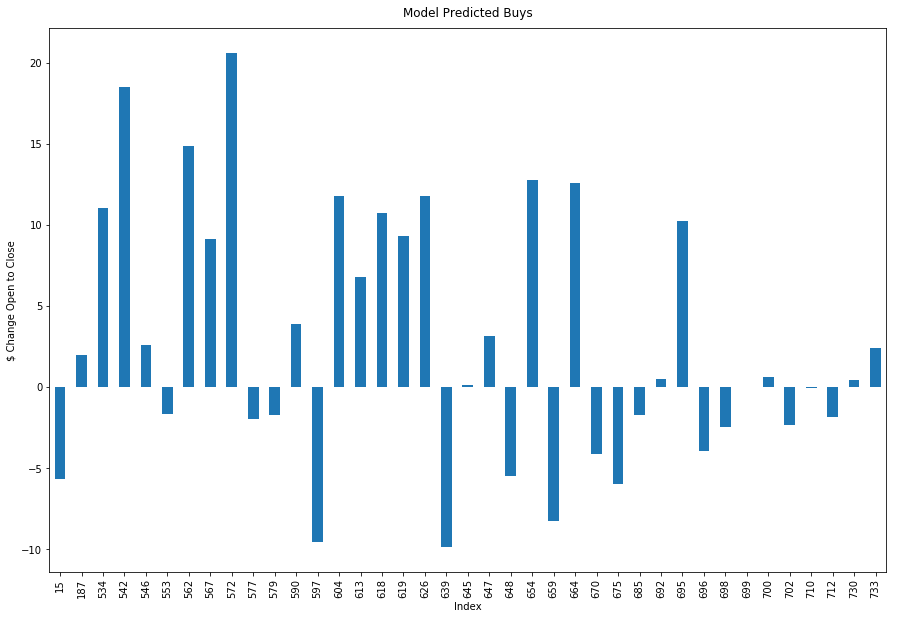

In [228]:
fig, ax = plt.subplots(figsize=(15,10))
rf[rf['predicted']==1]['$ chg'].plot(kind='bar')
ax.set_title('Model Predicted Buys', y=1.01)
ax.set_ylabel('$ Change Open to Close')
ax.set_xlabel('Index')

In [229]:
#drop threshold from $1 to $0.25

X_train, X_test = X[:2188], X[2188:]
y_train = ipos['$ Chg Open to Close'][:2188].map(lambda x: 1 if x >= .25 else 0)
y_test = ipos['$ Chg Open to Close'][2188:].map(lambda x: 1 if x >= .25 else 0)
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.57757496740547587

In [231]:
#accuracy dropped and mean decrease 

pred_label = clf.predict(X_test)
results=[]
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index,
ipos.ix[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results.append([idx, chg, pl, tl, 1])
    else:
        results.append([idx, chg, pl, tl, 0])
rf = pd.DataFrame(results, columns=['index', '$ chg', 'predicted','actual', 'correct'])
rf[rf['predicted']==1]['$ chg'].describe()

count    85.000000
mean      1.452824
std       5.912033
min     -15.870000
25%      -0.870000
50%       0.250000
75%       2.900000
max      20.600000
Name: $ chg, dtype: float64

In [232]:
# include 2014 data

X_train, X_test = X[:1900], X[1900:]
y_train = ipos['$ Chg Open to Close'][:1900].map(lambda x: 1 if x >= .25 else 0)
y_test = ipos['$ Chg Open to Close'][1900:].map(lambda x: 1 if x >= .25 else 0)
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.59715639810426535

In [233]:
# mean increased and model continues to be better than naive approach
# accuracy is better

pred_label = clf.predict(X_test)
results=[]
for pl, tl, idx, chg in zip(pred_label, y_test, y_test.index,
ipos.ix[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results.append([idx, chg, pl, tl, 1])
    else:
        results.append([idx, chg, pl, tl, 0])
rf = pd.DataFrame(results, columns=['index', '$ chg', 'predicted','actual', 'correct'])
rf[rf['predicted']==1]['$ chg'].describe()

count    75.000000
mean      1.612667
std       8.496641
min     -15.870000
25%      -1.780000
50%       0.200000
75%       2.055000
max      56.540000
Name: $ chg, dtype: float64

In [47]:
#Feature importance: 
# which feature increase probability
# ln(p/1-p) = B_0 + B_1x (Logistic Function)
# p - probability of positive outcome
# B_0 i intercept
# B_1 - Co-efficient



SyntaxError: invalid syntax (<ipython-input-47-be0742bb2086>, line 2)

In [48]:
#Categorial feature, Positive sign tells us that when present,
#this feature increase the probability of positive outcome vs the baseline.

#Continuous feature, positive sign tells us an increase in this feature
# correspond to an increase of probability of positive outcome
# size of coefficient tells the magnitude of increase in probability.


# Friday is missing, so it means Friday is the baseline that it's being compared
fv = pd.DataFrame(X_train.columns, clf.coef_.T).reset_index()
fv.columns = ['Coef', 'Feature']
fv.sort_values('Coef', ascending=0).reset_index(drop=True)

,Coef,Feature
0,1.298090,"Q(""Lead Mgr"")[T.BMO Capital Markets]"
1,0.923913,"Q(""Lead Mgr"")[T.Bear Stearns]"
2,0.821403,"Q(""Lead Mgr"")[T.Needham]"
3,0.749887,"Q(""Lead Mgr"")[T.Wachovia]"
4,0.663231,"Q(""Lead Mgr"")[T.Piper Jaffray]"
5,0.660344,Month[T.Sep]
6,0.657196,"Q(""Lead Mgr"")[T.Merrill Lynch]"
7,0.601065,"Q(""Lead Mgr"")[T.Northland Capital Markets]"
8,0.575810,"Q(""Lead Mgr"")[T.KeyBanc Capital Markets]"
9,0.574792,"Q(""Lead Mgr"")[T.Craig-Hallum Capital Group]"


In [49]:
# holding all else constants, Tuesday is worst for IPO, Thursday is good.
fv[fv['Feature'].str.contains('Week Day')]

,Coef,Feature
12,-0.503610,"Q(""Week Day"")[T.Mon]"
13,0.163252,"Q(""Week Day"")[T.Thurs]"
14,-0.352491,"Q(""Week Day"")[T.Tues]"
15,-0.053708,"Q(""Week Day"")[T.Wed]"


In [237]:
# lead managers.
ipos[ipos['Lead Mgr'].str.contains('Keegan|Towbin')]



,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Change Opening,$ Change Close,...,% Chg Open to Close,SP Week Change,Sp Close to open Chg Pct,Lead Mgr,Total Underwriters,Week Day,Month,Gap Open Pct,Open to Close Pct,Sp Close to Open Chg Pct
1186,2011-06-22,Fidus Investment,FDUS,Morgan Keegan,15.0,14.75,15.00,0.00,-0.25,0.00,...,1.694915,2.002316,-0.003176,Morgan Keegan,1,Wed,Jun,-1.694915,1.694915,-0.003176
1538,2007-02-26,Rosetta Genomics,ROSG,"C.E. Unterberg, Towbin",7.0,7.02,7.32,4.57,0.02,0.32,...,4.273504,0.558542,-0.112784,"C.E. Unterberg, Towbin",1,Mon,Feb,0.284900,4.273504,-0.112784
2128,2005-08-04,Advanced Life Sciences,ADLS,"C.E. Unterberg, Towbin/ThinkEquity Partners",5.0,5.03,6.00,20.00,0.03,1.00,...,19.284294,1.367994,-0.736594,"C.E. Unterberg, Towbin",2,Thurs,Aug,0.596421,19.284294,-0.736594
2575,2002-05-21,Computer Programs and Systems,CPSI,Morgan Keegan/Raymond James,16.5,17.50,18.12,9.82,1.00,1.62,...,3.542857,1.836374,-1.097333,Morgan Keegan,2,Tues,May,5.714286,3.542857,-1.097333
2656,2001-05-23,Smith & Wollensky,SWRG,CE Unterberg Towbin,8.5,8.51,7.77,-8.59,0.01,-0.73,...,-8.695652,5.160997,-1.548710,CE Unterberg Towbin,1,Wed,May,0.117509,-8.695652,-1.548710
2714,2001-12-14,Northwest Biotherapeutics,NWBT,"C.E. Unterberg, Towbin",5.0,5.10,5.31,6.20,0.10,0.31,...,4.117647,-2.163762,0.331527,"C.E. Unterberg, Towbin",1,Fri,Dec,1.960784,4.117647,0.331527
2846,2000-08-09,Millennium Cell,MCEL,Morgan Keegan,10.0,10.00,10.00,0.00,0.00,0.00,...,0.000000,4.471578,-0.660627,Morgan Keegan,1,Wed,Aug,0.000000,0.000000,-0.660627
2876,2000-08-25,ServiceWare Technologies,SVCW,"C.E. Unterberg, Towbin",7.0,8.50,8.75,25.00,1.50,1.75,...,2.941176,1.634876,-0.122440,"C.E. Unterberg, Towbin",1,Fri,Aug,17.647059,2.941176,-0.122440


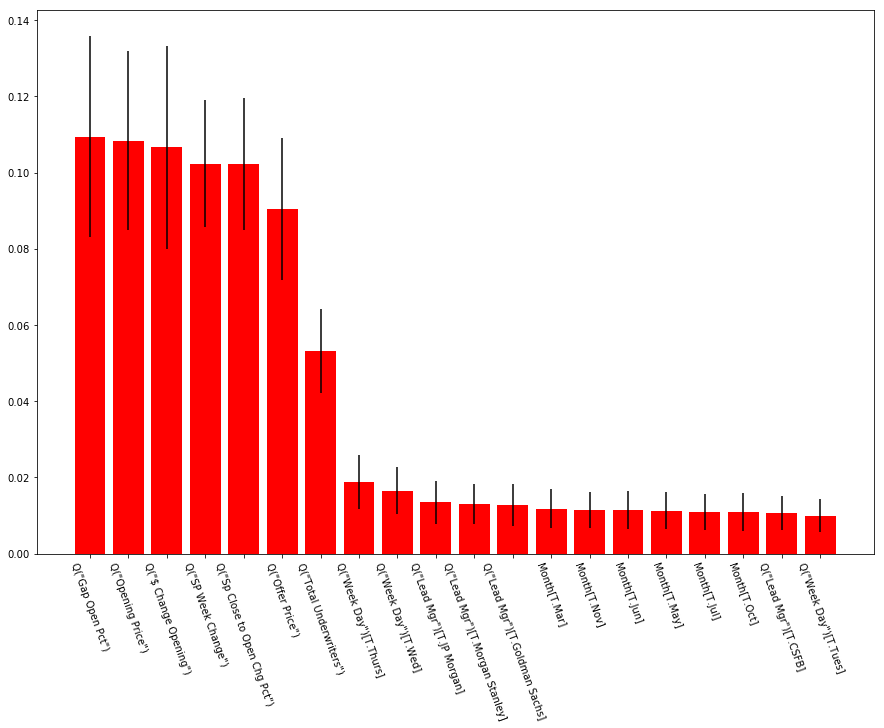

In [238]:
# can use random forest to find feature importance.

clf_rf = RandomForestClassifier(n_estimators=1000)
clf_rf.fit(X_train, y_train)
f_importances = clf_rf.feature_importances_
f_names = X_train
f_std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)
zz = zip(f_importances, f_names, f_std)
zzs = sorted(zz, key=lambda x: x[0], reverse=True)
imps = [x[0] for x in zzs[:20]]
labels = [x[1] for x in zzs[:20]]
errs = [x[2] for x in zzs[:20]]
plt.subplots(figsize=(15,10))
plt.bar(range(20), imps, color="r", yerr=errs, align="center")
plt.xticks(range(20), labels, rotation=-70);